<a href="https://colab.research.google.com/github/devleoespinosa/LLM_Curso/blob/main/EJERCICIO_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRIMER VISTAZO A LA LIBRERÍA DE DATASETS


In [8]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [9]:
#Importación de todos los datasets
from datasets import load_dataset

In [10]:
#Elegir el dataset que necesitamos

emotion = load_dataset("emotion")
emotion

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [11]:
#División de los datos

train_dataset = emotion["train"]
train_dataset["text"][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

In [12]:
validation_dataset = emotion["validation"]
validation_dataset["text"][:5]

['im feeling quite sad and sorry for myself but ill snap out of it soon',
 'i feel like i am still looking at a blank canvas blank pieces of paper',
 'i feel like a faithful servant',
 'i am just feeling cranky and blue',
 'i can have for a treat or if i am feeling festive']

In [13]:
test_dataset = emotion["test"]
test_dataset["text"][:5]

['im feeling rather rotten so im not very ambitious right now',
 'im updating my blog because i feel shitty',
 'i never make her separate from me because i don t ever want her to feel like i m ashamed with her',
 'i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived',
 'i was feeling a little vain when i did this one']

TRANSFORMAR DATASET A DATAFRAME

In [14]:
import pandas as pd


In [15]:
#Transformación a pandas
emotion_df = pd.DataFrame(emotion["train"])
emotion_df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [16]:
def transform_labels(label):
  return emotion['train'].features["label"].int2str(label)

emotion_df["label_name"] = emotion_df["label"].apply(transform_labels)
emotion_df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


DISTRIBUCIÓN DE CLASES


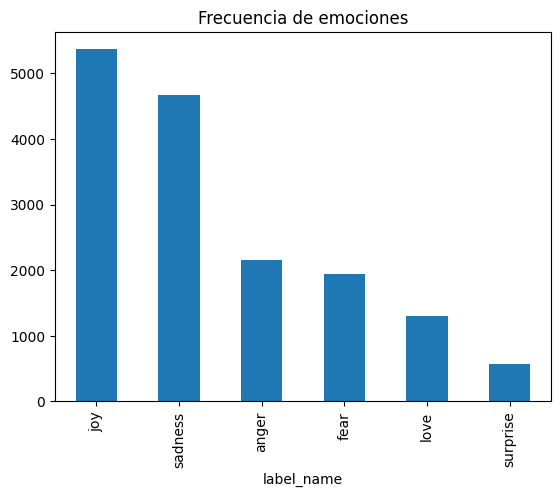

In [17]:
import matplotlib.pyplot as plt
emotion_df['label_name'].value_counts().plot.bar()
plt.title("Frecuencia de emociones")
plt.show()

PALABRAS POR ORACIÓN

In [18]:
emotion_df["num_words"] = emotion_df["text"].apply(lambda x: len(x.split()))
emotion_df.head()

,text,label,label_name,num_words
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4


<function matplotlib.pyplot.show(close=None, block=None)>

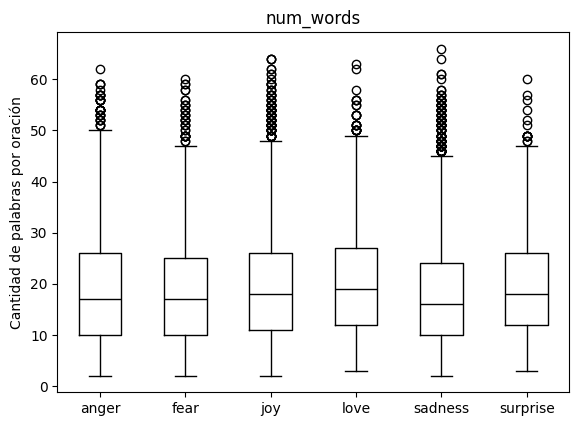

In [19]:
emotion_df.boxplot("num_words", by="label_name", grid=False, color='black')
plt.suptitle("")
plt.xlabel("")
plt.ylabel("Cantidad de palabras por oración")
plt.show

In [20]:
emotion.reset_format()

TOKENIZACIÓN DEL DATASET

In [21]:
from transformers import AutoTokenizer
model = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [24]:
def tokenize(batch):
  return tokenizer(batch["text"], padding=True, truncation=True)



In [25]:
print(tokenize(emotion['train'][:5]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102], [101, 10047, 9775, 1037, 3371, 2000, 2695, 1045, 2514, 20505, 3308, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2572, 2412, 3110, 16839, 9080, 12863, 2055, 1996, 13788, 1045, 2097, 2113, 2008, 2009, 2003, 2145, 2006, 1996, 3200, 102, 0], [101, 1045, 2572, 3110, 24665, 7140, 11714, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}


In [26]:
#Aplicar los lotes y sus recortes a todo el dataset
emotion_encoded = emotion.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [27]:
print(emotion_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


IMPLEMENTACIÓN DEL MODELO

In [29]:
!pip install torch

In [31]:
from transformers import AutoModel
import torch
import torch.nn.functional as F

model_ckpt = 'distilbert-base-uncased'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [33]:
#Transformando encoding to embeding

text = "This is a test"
inputs = tokenizer(text, return_tensors="pt")
print(inputs['input_ids'].size())

torch.Size([1, 6])


In [35]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
  outputs = model(**inputs)

print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]]), hidden_states=None, attentions=None)


In [36]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [37]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [38]:
def extract_hidden_states(batch):
  inputs = {k:v.to(device) for k,v in batch.items()
            if k in tokenizer.model_input_names}
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
  return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}



In [39]:
emotion_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])
emotion_hidden = emotion_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [40]:
emotion_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [41]:
#Adaptar las etiquetas y los estados ocultos a los valores de scikit learn
import numpy as np

x_train = np.array(emotion_hidden["train"]["hidden_state"])
x_valid = np.array(emotion_hidden["validation"]["hidden_state"])
y_train = np.array(emotion_hidden["train"]["label"])
y_valid = np.array(emotion_hidden["validation"]["label"])

x_train.shape

(16000, 768)

In [44]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.6 MB/s eta 0:00:00


In [45]:

#Visualizar datos de entrenamiento
#Disminuir dimensionalidad de 768 a 2D

from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

#Normalizar con máximos y mínimos
X_scaled = MinMaxScaler().fit_transform(x_train)

mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)

#Construirlo en 2D
df_emb = pd.DataFrame()
df_emb["X"] = mapper.embedding_[:,0]
df_emb["Y"] = mapper.embedding_[:,1]
df_emb["Clase"] = y_train
df_emb.head()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,X,Y,Clase
0,4.089524,6.342935,0
1,-3.119059,5.954367,0
2,5.149825,2.929137,3
3,-2.449556,3.887997,2
4,-3.467464,4.063348,3


<function matplotlib.pyplot.show(close=None, block=None)>

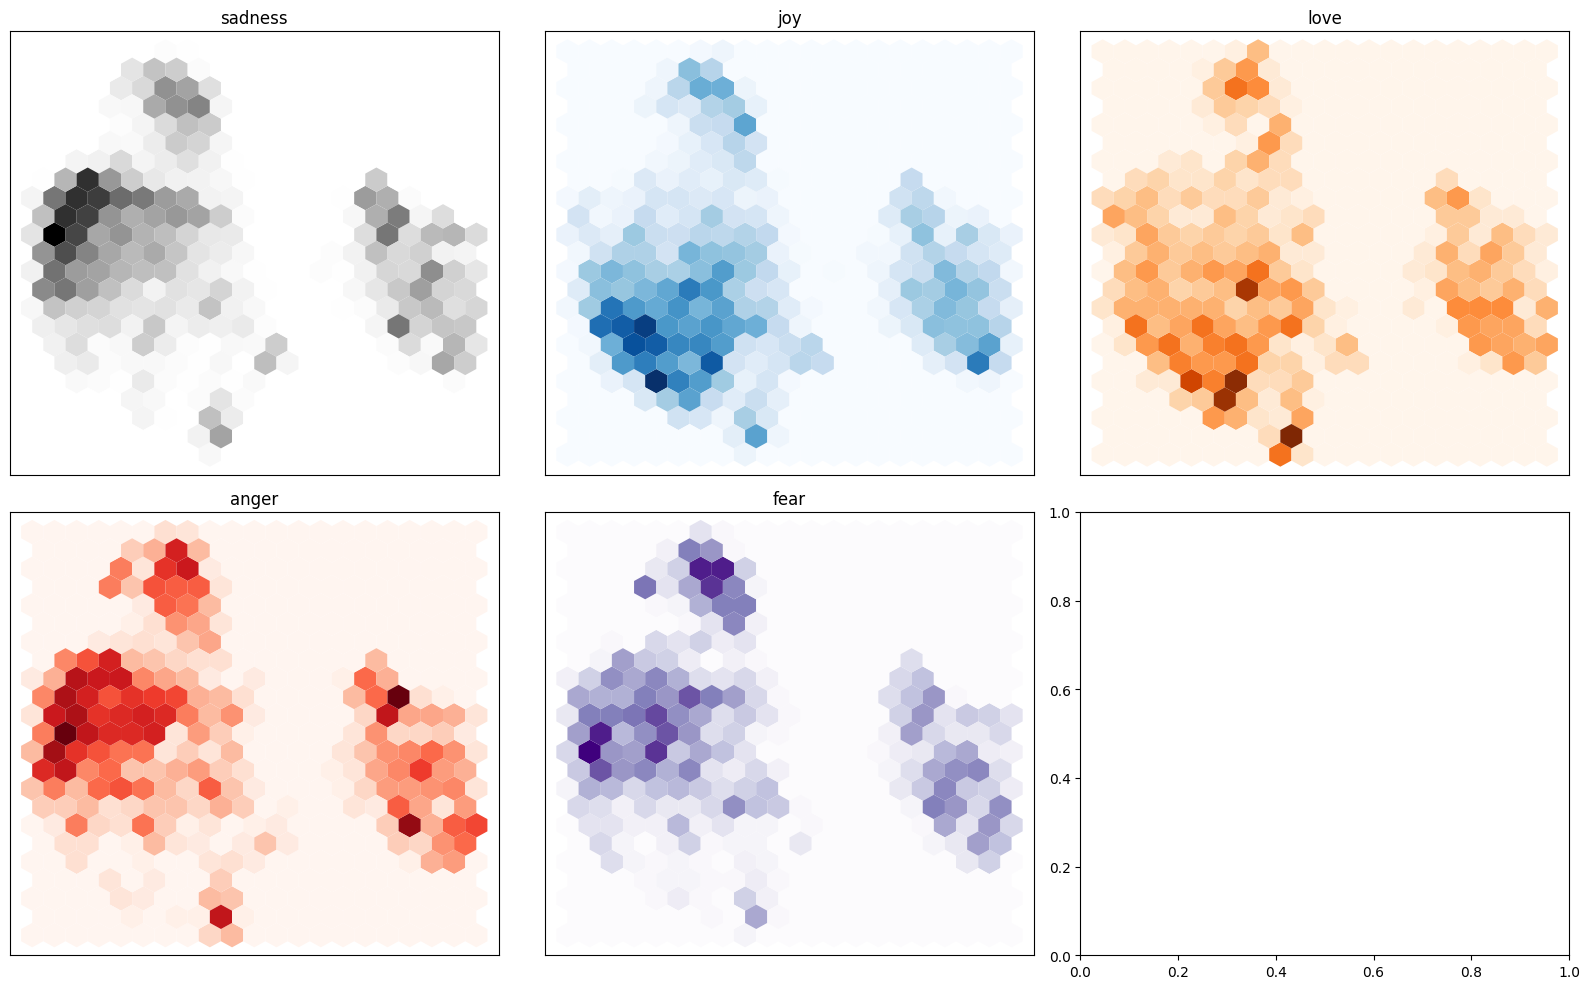

In [47]:
#Gráficas de densidad para cada emoción

fig, axes = plt.subplots(2,3, figsize=(16,10))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples"]
labels = emotion['train'].features['label'].names
for i, (label, cmap) in enumerate(zip(labels, cmaps)):
  df_emb_sub = df_emb.query(f"Clase == {i}")
  axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap, gridsize=20, linewidths=(0,))
  axes[i].set_title(f"{label}")
  axes[i].set_xticks([]), axes[i].set_yticks([])
plt.tight_layout()
plt.show

In [48]:
#Clasificador simple con un modelo de regresión logística

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(x_train, y_train)
lr_clf.score(x_valid, y_valid)

0.634

In [49]:
#Comparación con una base lineal simple

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_train, y_train)
dummy_clf.score(x_valid, y_valid)

0.352

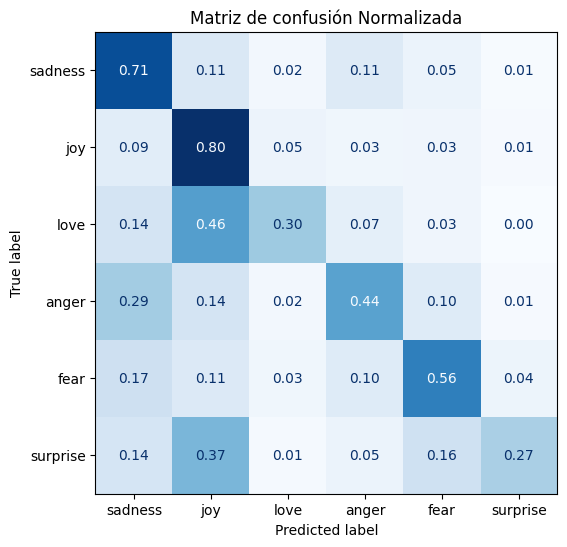

In [50]:
#Matriz de confusión

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6,6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Matriz de confusión Normalizada")
  plt.show()


y_preds = lr_clf.predict(x_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

CON EL PROCESO DE FINE-TUNNING

In [51]:
#Utilizamos un modelo forsequence en lugar del automodel normal

from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [52]:
#Generación de función para métricas

from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}


In [54]:
#Parámetros de entrenamiento

from transformers import TrainingArguments, Trainer

batch_size = 64
logging_steps = len(emotion_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=False,
                                  log_level="error")

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [56]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineGrained).
The token `devleo1` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `devleo1`


In [57]:
#Entrenamiento

trainer = Trainer(model=model, args=training_args, compute_metrics=compute_metrics, train_dataset=emotion_encoded["train"], eval_dataset=emotion_encoded["validation"], tokenizer=tokenizer)
trainer.train()


<ipython-input-57-0ee1b7dcd2e6>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, args=training_args, compute_metrics=compute_metrics, train_dataset=emotion_encoded["train"], eval_dataset=emotion_encoded["validation"], tokenizer=tokenizer)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.815600,0.303780,0.913500,0.912722
2,0.247100,0.218310,0.924500,0.924444


TrainOutput(global_step=500, training_loss=0.5313254013061524, metrics={'train_runtime': 15887.1764, 'train_samples_per_second': 2.014, 'train_steps_per_second': 0.031, 'total_flos': 720342861696000.0, 'train_loss': 0.5313254013061524, 'epoch': 2.0})

In [59]:
preds_output = trainer.predict(emotion_encoded["validation"])
preds_output.metrics

{'test_loss': 0.21831014752388,
 'test_accuracy': 0.9245,
 'test_f1': 0.9244436466550481,
 'test_runtime': 296.9034,
 'test_samples_per_second': 6.736,
 'test_steps_per_second': 0.108}

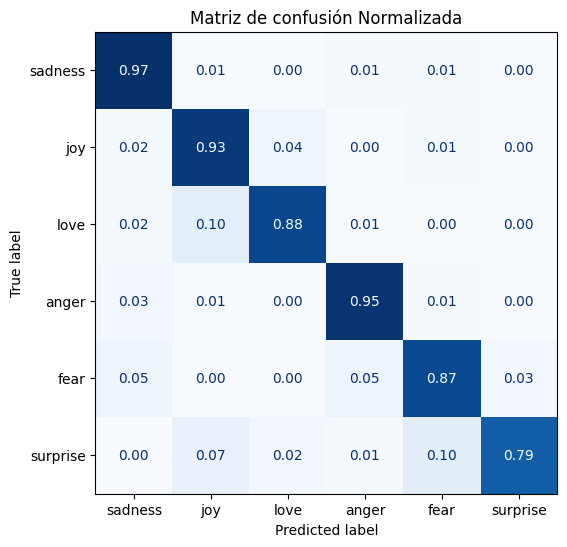

In [60]:
y_preds = np.argmax(preds_output.predictions, axis=1)
plot_confusion_matrix(y_preds, emotion_encoded["validation"]["label"], labels)

In [61]:
#Análisis de error

from torch.nn.functional import cross_entropy

def forward_with_labels(batch):
  inputs = {k:v.to(device) for k,v in batch.items()
            if k in tokenizer.model_input_names}
  with torch.no_grad():
    output = model(**inputs)
    pred_label = torch.argmax(output.logits, axis=1)
    loss = cross_entropy(output.logits, batch["label"].to(device), reduction="none")
  return {"loss": loss.cpu().numpy(), "predicted_label": pred_label.cpu().numpy()}

In [62]:
emotion_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])
emotion_encoded["validation"] = emotion_encoded["validation"].map(forward_with_labels, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [63]:
emotion_encoded["validation"].set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
preds_df = emotion_encoded["validation"][:][cols]
preds_df["label"] = preds_df["label"].apply(transform_labels)
preds_df["predicted_label"] = preds_df["predicted_label"].apply(transform_labels)
preds_df.sort_values(by="loss", ascending=False).head(10)

,text,label,predicted_label,loss
1963,i called myself pro life and voted for perry w...,joy,sadness,5.575963
1801,i feel that he was being overshadowed by the s...,love,sadness,5.440948
1111,im lazy my characters fall into categories of ...,joy,fear,5.432556
1870,i guess i feel betrayed because i admired him ...,joy,sadness,5.200961
1274,i am going to several holiday parties and i ca...,joy,sadness,4.956521
1500,i guess we would naturally feel a sense of lon...,anger,sadness,4.858384
882,i feel badly about reneging on my commitment t...,love,sadness,4.845636
765,i feel super awkward and out of place right now,joy,sadness,4.593284
1683,i had applied for a job and they had assured m...,anger,joy,4.539347
1509,i guess this is a memoir so it feels like that...,joy,fear,4.441524


In [64]:
preds_df.sort_values(by="loss", ascending=True).head(10)

,text,label,predicted_label,loss
1147,i type i feel bouncy and excited to get out my...,joy,joy,0.015681
1873,i feel practically virtuous this month i have ...,joy,joy,0.015754
1090,i dont know what it is about me and sweets the...,joy,joy,0.015781
669,i am not feeling very joyful today its been a ...,joy,joy,0.016357
620,i shall move right along to the post interview...,joy,joy,0.016673
578,i got to christmas feeling positive about the ...,joy,joy,0.016708
222,i am at day and i am feeling terrific,joy,joy,0.016736
632,i feel he is an terrific really worth bet,joy,joy,0.016817
604,i don t like to use the h word recklessly but ...,joy,joy,0.016846
131,i feel like a graph doesnt show the data accur...,joy,joy,0.016903


In [65]:
trainer.push_to_hub(commit_message="Training completed, chapter 2 completed")

events.out.tfevents.1737938910.76d19750e152.2036.0:   0%|          | 0.00/5.28k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

events.out.tfevents.1737939280.76d19750e152.2036.1:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.37k [00:00<?, ?B/s]

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

CommitInfo(commit_url='https://huggingface.co/devleoespinosa/distilbert-base-uncased-finetuned-emotion/commit/8b5c9b78f4a5c084c2f6a24e9505d3fa7f218911', commit_message='Training completed, chapter 2 completed', commit_description='', oid='8b5c9b78f4a5c084c2f6a24e9505d3fa7f218911', pr_url=None, repo_url=RepoUrl('https://huggingface.co/devleoespinosa/distilbert-base-uncased-finetuned-emotion', endpoint='https://huggingface.co', repo_type='model', repo_id='devleoespinosa/distilbert-base-uncased-finetuned-emotion'), pr_revision=None, pr_num=None)